In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
import pygmt

In [3]:
data = {
    "deployment_date": ["08-07-2024","08-07-2024","09-07-2024","11-07-2024","11-07-2024","12-07-2024",
"12-07-2024","13-07-2024","13-07-2024"],
    "deployment_time (UTC)": ["05:50","11:34","11:21","11:36","14:52","02:54","14:42","02:47","05:36"],
    "latitude" :[11.25, 11.25, 11.25, 10.83, 10.74, 10.4, 9.6, 8.74, 8.718],
    "longitude" : [72.53, 72.53, 72.53, 73.53, 73.71, 75.25, 75.92, 76.4, 76.504]
}

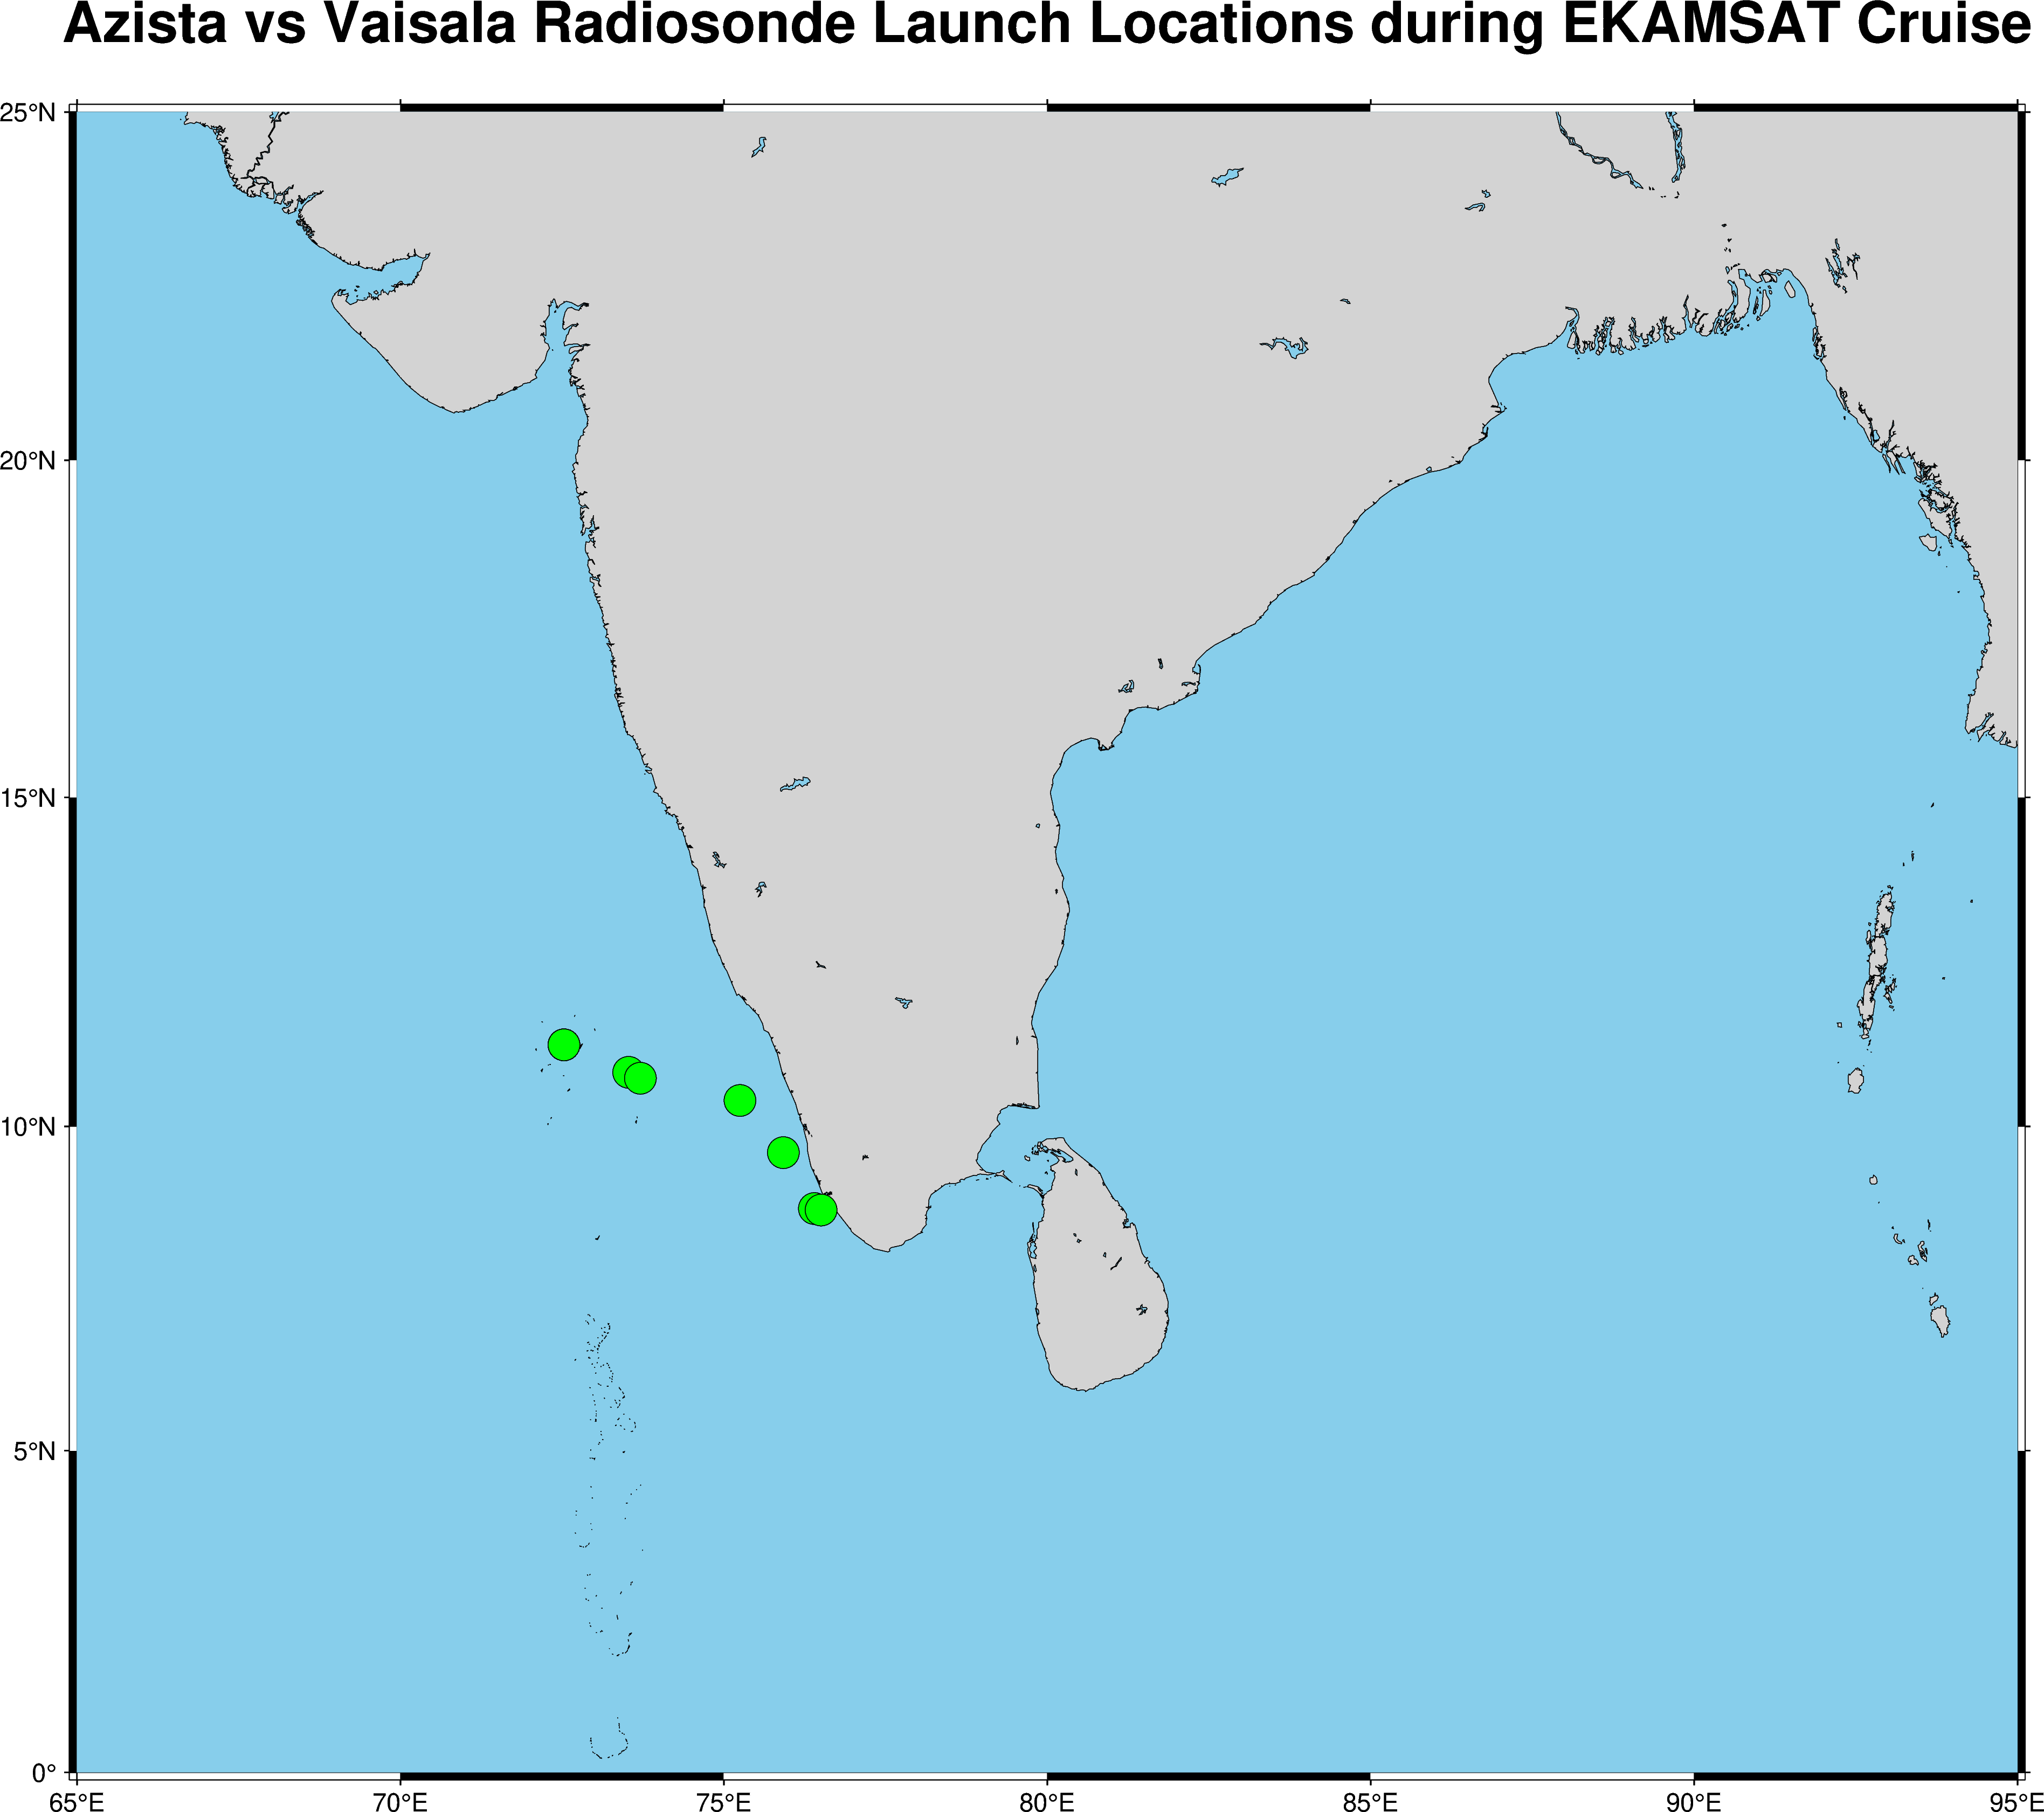

In [5]:
fig = pygmt.Figure()
region = [65,95,0,25]

fig.basemap(region = region, projection = "M12i",  frame = ["a", "+tAzista vs Vaisala Radiosonde Launch Locations during EKAMSAT Cruise \n June - July 2024"])
fig.coast(land="lightgrey", water = "skyblue", shorelines = True,)
fig.plot(x=data['longitude'], y=data['latitude'], style = "c0.5c", fill="green",pen="black")

fig.savefig("launch_locations.png")
fig.show()

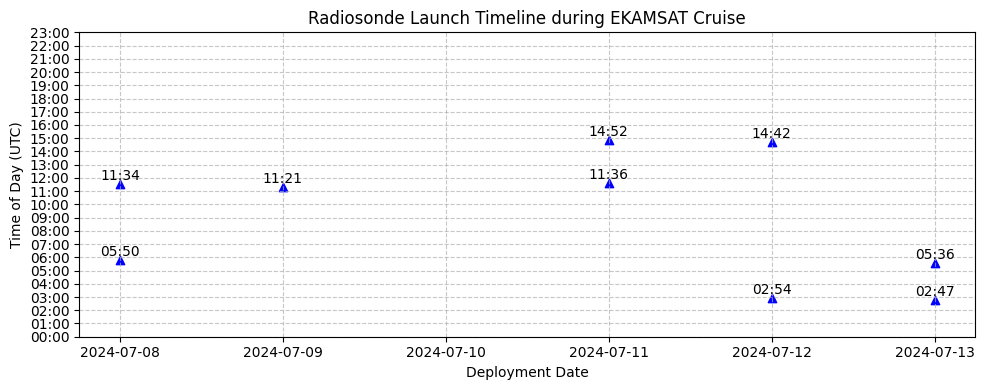

In [7]:
# Sample dictionary input

# data = {
#     "deployment_date": ["2024-07-08", "2024-07-09", "2024-07-10", "2024-07-11"],
#     "deployment_time": ["05:57", "06:01", "05:59", "06:05"]
# }

# Convert to DataFrame
df = pd.DataFrame(data)

# Combine date and time into datetime
df['datetime'] = pd.to_datetime(df['deployment_date'] + ' ' + df['deployment_time (UTC)'], dayfirst=True)

# Extract date and time separately for plotting
df['date'] = df['datetime'].dt.date
df['time_of_day'] = df['datetime'].dt.time


# Convert time_of_day to matplotlib-compatible float hours for y-axis
df['time_float'] = df['datetime'].dt.hour + df['datetime'].dt.minute / 60



# Plot
plt.figure(figsize=(10, 4))
plt.scatter(df['date'], df['time_float'], color='blue', marker='^')


# Format y-axis as time labels
yticks = range(0, 24)
yticklabels = [f"{h:02d}:00" for h in yticks]
plt.yticks(yticks, yticklabels)

# Annotate times
for i, row in df.iterrows():
    plt.text(row['date'] , row['time_float'] + 0.3, row['deployment_time (UTC)'], fontsize=10, ha='center')

# plt.xlabel("Deployment Date")
# plt.ylabel("Time of Day (UTC)")
# plt.title("Radiosonde Launch Timeline during EKAMSAT Cruise")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

plt.xlabel("Deployment Date")
plt.ylabel("Time of Day (UTC)")
plt.title("Radiosonde Launch Timeline during EKAMSAT Cruise")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig("launch_time_1.png")
plt.show()


In [ ]:
print(df.iterrows)

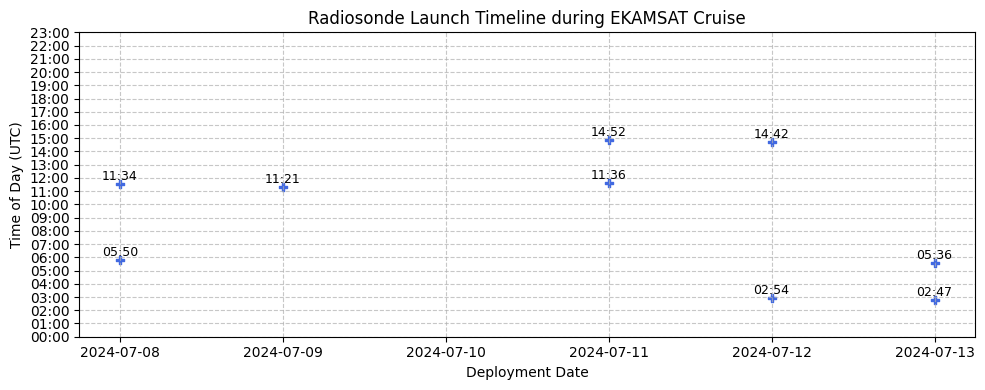

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Input dictionary with DD-MM-YYYY format
# data = {
#     "deployment_date": ["08-07-2024", "09-07-2024", "10-07-2024", "11-07-2024"],
#     "deployment_time": ["05:57", "06:01", "05:59", "06:05"]
# }

# Convert to DataFrame
df = pd.DataFrame(data)

# Combine date and time into datetime, specifying dayfirst=True
df['datetime'] = pd.to_datetime(df['deployment_date'] + ' ' + df['deployment_time (UTC)'], dayfirst=True)

# Extract date and time separately
df['date'] = df['datetime'].dt.date
df['time_float'] = df['datetime'].dt.hour + df['datetime'].dt.minute / 60

# Plot
plt.figure(figsize=(10, 4))
plt.scatter(df['date'], df['time_float'], color='royalblue', marker='P')

# Format y-axis to show time labels
yticks = range(0, 24)
yticklabels = [f"{h:02d}:00" for h in yticks]
plt.yticks(yticks, yticklabels)

# Annotate time labels on plot
for i, row in df.iterrows():
    plt.text(row['date'], row['time_float'] + 0.3, row['deployment_time (UTC)'], ha='center', fontsize=9)

plt.xlabel("Deployment Date")
plt.ylabel("Time of Day (UTC)")
plt.title("Radiosonde Launch Timeline during EKAMSAT Cruise")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig("launch_time_2.png")
plt.show()
